In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("Data/Churn_Modelling.csv")

In [4]:
data.drop(['RowNumber', 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

In [5]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
data_type_dict = dict(data.dtypes)
Label_encoder_collection = {}
for col_name, data_type in data_type_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [8]:
X = data.iloc[: , :-1].values.astype(np.float32)
Y = data.iloc[: , -1].values.astype(int)

In [9]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [10]:
# Start your model with Sequential Object  
model = tf.keras.models.Sequential()
# Next add in your Input object and Specify the Dimension you want to pass in 
model.add(tf.keras.Input(shape=(10,)))
# Add in your Neurons of 1st layer
model.add(tf.keras.layers.Dense(32))
# 2nd layer 
model.add(tf.keras.layers.Dense(32))
# Final Sigmoid layer to predict (0/1)
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# print summary to undertstand your neural network flow
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [20]:
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [21]:
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20)

Epoch 1/20
250/250 [==============================] - 3s 5ms/step - loss: 0.4597 - accuracy: 0.7946 - val_loss: 0.3812 - val_accuracy: 0.8555
Epoch 2/20
250/250 [==============================] - 1s 5ms/step - loss: 0.4048 - accuracy: 0.8234 - val_loss: 0.3410 - val_accuracy: 0.8675
Epoch 3/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3874 - accuracy: 0.8344 - val_loss: 0.3418 - val_accuracy: 0.8665
Epoch 4/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3829 - accuracy: 0.8407 - val_loss: 0.3366 - val_accuracy: 0.8650
Epoch 5/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3738 - accuracy: 0.8418 - val_loss: 0.3356 - val_accuracy: 0.8640
Epoch 6/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3704 - accuracy: 0.8439 - val_loss: 0.3320 - val_accuracy: 0.8685
Epoch 7/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3678 - accuracy: 0.8480 - val_loss: 0.3337 - val_accuracy: 0.8690
Epoch 

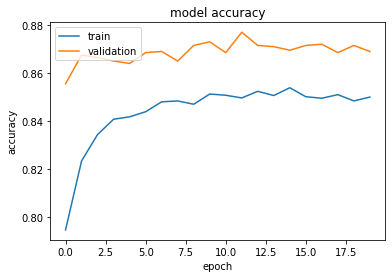

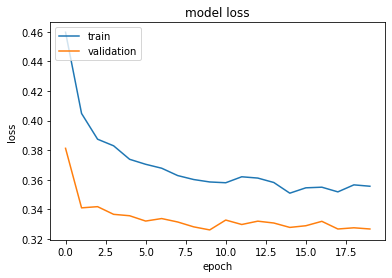

In [22]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# We see a lot of fluctuations in Accuracy Graph which concludes model learning is unstable 

In [23]:
# collect predictions 
predictions = np.round(model.predict(Xtest))

63/63 [==============================] - 0s 2ms/step


In [24]:
from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(Ytest , predictions) # Accuracy Seems good

0.869

In [25]:
confusion_matrix(Ytest , predictions)

array([[1548,   56],
       [ 206,  190]], dtype=int64)

## Improving Result of Neural Network

In [17]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced' ,  classes = np.unique(Ytrain), y=Ytrain)

model_class_weights = {}
for e , weight in enumerate(class_weights):
    model_class_weights[e] = weight

In [18]:
model_class_weights

{0: 0.6290297216543481, 1: 2.437538086532602}

In [19]:
# Add in Class weights to handle Imbalance 
# Increase Units in Dense layers and Also Increase Number of Layers 
# Add BatchNormalization to Layers 
# Add Dropout after Layers 

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32 , activation='relu'))
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# print summary to undertstand your neural network flow
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)               

In [26]:
from sklearn.metrics import classification_report 

print(classification_report(Ytest , predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1604
           1       0.77      0.48      0.59       396

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

